In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

In [107]:
def frame_to_frame_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    camera_positions = ['6x6']
    scenes = ['ArchVizInterior']
    QPs = [20]
    synthesizers = ['AdditiveSynthesizer']
    pose_traces = [f'pose{i}' for i in range(10)]

    dir_paths = []

    for camera_position in camera_positions:
        for scene in scenes:
            for QP in QPs:
                for synthesizer in synthesizers:
                    for pose_trace in pose_traces:
                        dir_paths.append(f'./psnr/{synthesizer}/{camera_position}_{scene}_rec{QP}_{synthesizer}_{pose_trace}_psnr.csv')
    
    df = pd.DataFrame()
    for i in range(len(dir_paths)):
        df_tmp = pd.read_csv(dir_paths[i])
        df_tmp.insert(df_tmp.shape[1], 'pose', f'pose{i}')
        print(df_tmp)
        df = df.append(df_tmp)

    df_tmp = df
    # df_tmp = df_tmp.loc[(df_tmp['pose'] == 'pose0') ^ (df_tmp['pose'] == 'pose4')]

    # PSNR    
    ax = sns.lineplot(x='Frame', y=f'psnr_y', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"PSNR (dB)")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,33)) 
    # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.eps', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.png', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.lineplot(x='Frame', y=f'float_ssim', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"SSIM")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,1)) 
    # plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.eps', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.png', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/ssim_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.lineplot(x='Frame', y=f'vmaf', style='pose', data=df_tmp)
    ax.set(xlabel="Frame", ylabel=f"VMAF")
    plt.legend(title="")
    plt.xlim((0,90))
    plt.ylim((0,100))   
    # plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.eps', dpi=300)
    # plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_and_pose4.png', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
    plt.savefig(f'./img/frame_to_frame_quality/vmaf_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

In [108]:
def scene_average_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)

    camera_position = '6x6'
    scene = 'ArchVizInterior'
    QP = 20
    synthesizer = 'AdditiveSynthesizer'

    df_tmp = df
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == camera_position) &
                        (df_tmp['scene'] == scene) &
                        (df_tmp['QP'] == QP) &
                        (df_tmp['synthesizer'] == synthesizer)]
    
    df_tmp = df_tmp.sort_values('psnr_mean', ascending=False)
    df_tmp['new_pose_traces'] = [f'pose{i}' for i in range(10)]

    # PSNR
    ax = sns.barplot(x='new_pose_traces', y=f'psnr_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"PSNR (dB)")
    plt.ylim((0,33)) 
    plt.savefig(f'./img/average_quality/psnr_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/psnr_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x='new_pose_traces', y=f'ssim_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"SSIM")
    plt.ylim((0,1))   
    plt.savefig(f'./img/average_quality/ssim_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/ssim_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x='new_pose_traces', y=f'vmaf_mean', data=df_tmp)
    ax.set(xlabel="Trajectory", ylabel=f"VMAF")
    plt.ylim((0,100))   
    plt.savefig(f'./img/average_quality/vmaf_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/vmaf_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

In [109]:
def average_quality(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    df = pd.DataFrame()
    df_tmp = pd.read_csv(f'./results/all_nG1.csv')
    df = df.append(df_tmp)

    camera_position = '6x6'
    QP = 20
    synthesizer = 'AdditiveSynthesizer'

    df_tmp = df
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == camera_position) &
                        (df_tmp['QP'] == QP) &
                        (df_tmp['synthesizer'] == synthesizer)]

    # PSNR
    ax = sns.barplot(x='scene', y=f'psnr_mean', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"PSNR (dB)")
    plt.xticks(rotation=-45)
    plt.ylim((0,33)) 
    plt.savefig(f'./img/average_quality/psnr_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/psnr_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x='scene', y=f'ssim_mean', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"SSIM")
    plt.xticks(rotation=-45)
    plt.ylim((0,1))   
    plt.savefig(f'./img/average_quality/ssim_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/ssim_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x='scene', y=f'vmaf_mean', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"VMAF")
    plt.xticks(rotation=-45)
    plt.ylim((0,100))   
    plt.savefig(f'./img/average_quality/vmaf_scene_in_6x6_rec20_AdditiveSynthesizer.eps', dpi=300)
    plt.savefig(f'./img/average_quality/vmaf_scene_in_6x6_rec20_AdditiveSynthesizer.png', dpi=300)
    plt.show()

In [110]:
def synthesizer_average(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare two synthesizers
    QP = 20
    numGroup = 1
    camera positions = '6x6'
    all scene
    all pose traces
    '''
    doplot = False

    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # don't discuss sphere_6x6 camera placement 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] != 'sphere_6x6')]
    df_tmp = df_tmp.loc[(df_tmp['QP'] == 20)]
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == '6x6')]
    # change synthesizer name
    df_tmp['synthesizer'] = df_tmp['synthesizer'].replace(['AdditiveSynthesizer','ViewWeightingSynthesizer'],['RVS-based', 'VWS'])

    # PSNR
    ax = sns.barplot(x=f'synthesizer', y=f'psnr_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Synthesizer", ylabel=f"PSNR (dB)")
    plt.ylim((0,30))
    if doplot:
        plt.savefig(f'./img/synthesizer_average/psnr_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/psnr_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x=f'synthesizer', y=f'ssim_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Synthesizer", ylabel=f"SSIM")
    plt.ylim((0,1))
    if doplot: 
        plt.savefig(f'./img/synthesizer_average/ssim_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/ssim_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'synthesizer', y=f'vmaf_mean', data=df_tmp, ci=None)
    ax.set(xlabel="Synthesizer", ylabel=f"VMAF")
    plt.ylim((0,100))
    if doplot:
        plt.savefig(f'./img/synthesizer_average/vmaf_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/vmaf_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # TMIV encoding time
    ax = sns.barplot(x=f'synthesizer', y=f'TMIV_decoding_time', data=df_tmp, ci=None)
    ax.set(xlabel="Synthesizer", ylabel=f"TMIV Decoding Time (sec)")
    plt.ylim((0,3000)) 
    if doplot:
        plt.savefig(f'./img/synthesizer_average/TMIV_decoding_time_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_average/TMIV_decoding_time_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    print('RVS-based: ', (df_tmp.loc[(df_tmp['synthesizer'] == 'RVS-based')])['TMIV_decoding_time'].mean())
    print('VWS: ', (df_tmp.loc[(df_tmp['synthesizer'] == 'VWS')])['TMIV_decoding_time'].mean())

In [111]:
def synthesizer_individual(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare two synthesizers in different scenes
    QP = 20
    numGroup = 1
    camera positions = '6x6'
    all pose traces
    '''
    doplot = False
    
    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # don't discuss sphere_6x6 camera placement 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] != 'sphere_6x6')]
    # set filter
    df_tmp = df_tmp.loc[(df_tmp['QP'] == 20)]
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == '6x6')]
    # change synthesizer name
    df_tmp['synthesizer'] = df_tmp['synthesizer'].replace(['AdditiveSynthesizer','ViewWeightingSynthesizer'],['RVS-based', 'VWS'])

    # PSNR
    ax = sns.barplot(x=f'scene', y=f'psnr_mean', hue=f'synthesizer', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"PSNR (dB)")
    plt.ylim((0,30))
    plt.xticks(rotation=-45) 
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/psnr_scene_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_individual/psnr_scene_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x=f'scene', y=f'ssim_mean', hue=f'synthesizer', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"SSIM")
    plt.ylim((0,1))
    plt.xticks(rotation=-45) 
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/ssim_scene_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_individual/ssim_scene_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'scene', y=f'vmaf_mean', hue=f'synthesizer', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"VMAF")
    plt.ylim((0,100))
    plt.xticks(rotation=-45) 
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/vmaf_scene_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_individual/vmaf_scene_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    # TMIV encoding time
    ax = sns.barplot(x=f'scene', y=f'TMIV_decoding_time', hue=f'synthesizer', data=df_tmp)
    ax.set(xlabel="Scene", ylabel=f"TMIV Decoding Time (sec)")
    plt.ylim((0,3000))
    plt.xticks(rotation=-45) 
    plt.legend(title='', loc='lower right')
    if doplot:
        plt.savefig(f'./img/synthesizer_individual/TMIV_decoding_time_scene_synthesizer_in_rec20.eps', dpi=300)
        plt.savefig(f'./img/synthesizer_individual/TMIV_decoding_time_scene_synthesizer_in_rec20.png', dpi=300)
    plt.show()

    for scene in scenes:
        print(scene)
        print('RVS-based: ', (df_tmp.loc[(df_tmp['synthesizer'] == 'RVS-based') & (df_tmp['scene'] == scene)])['vmaf_mean'].mean(), 
                ',', (df_tmp.loc[(df_tmp['synthesizer'] == 'RVS-based') & (df_tmp['scene'] == scene)])['TMIV_decoding_time'].mean())

        print('VWS: ', (df_tmp.loc[(df_tmp['synthesizer'] == 'VWS') & (df_tmp['scene'] == scene)])['vmaf_mean'].mean(), 
                ',', (df_tmp.loc[(df_tmp['synthesizer'] == 'VWS') & (df_tmp['scene'] == scene)])['TMIV_decoding_time'].mean())

In [112]:
def QP_average(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare different QPs
    synthesizer = 'AdditiveSynthesizer'
    numGroup = 1
    camera positions = '6x6'
    all pose traces
    all scenes
    '''
    doplot = False
    
    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # don't discuss sphere_6x6 camera placement 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] != 'sphere_6x6')]
    # set filter
    df_tmp = df_tmp.loc[(df_tmp['synthesizer'] == 'AdditiveSynthesizer')]
    df_tmp = df_tmp.loc[(df_tmp['camera_position'] == '6x6')]
    # PSNR
    ax = sns.barplot(x=f'QP', y=f'psnr_mean', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"PSNR (dB)")
    plt.ylim((0,30))
    if doplot:
        plt.savefig(f'./img/QP_average/psnr_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/psnr_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x=f'QP', y=f'ssim_mean', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"SSIM")
    plt.ylim((0,1))
    if doplot:
        plt.savefig(f'./img/QP_average/ssim_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/ssim_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'QP', y=f'vmaf_mean', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"VMAF")
    plt.ylim((0,100))
    if doplot:
        plt.savefig(f'./img/QP_average/vmaf_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/vmaf_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # TMIV decoding time
    ax = sns.barplot(x=f'QP', y=f'TMIV_decoding_time', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"TMIV Decoding Time (sec)")
    # plt.ylim((0,3000))
    if doplot:
        plt.savefig(f'./img/QP_average/TMIV_decoding_time_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/TMIV_decoding_time_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_encoding_time', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Encoding Time (sec)")
    # plt.ylim((0,3000))
    if doplot:
        plt.savefig(f'./img/QP_average/x265_encoding_time_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/x265_encoding_time_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_decoding_time', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Decoding Time (sec)")
    # plt.ylim((0,3000))
    if doplot:
        plt.savefig(f'./img/QP_average/x265_decoding_time_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/x265_decoding_time_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    df_tmp['Mbitrate'] = df_tmp['bitrate'].apply(lambda x: x*(0.000001))
    # bitrate
    ax = sns.barplot(x=f'QP', y=f'Mbitrate', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"Bitrates (MBps)")
    # plt.ylim((0,3000))
    if doplot:
        plt.savefig(f'./img/QP_average/bitrate_QP_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_average/bitrate_QP_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    for QP in QPs:
        print(QP)
        print('VMAF: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['vmaf_mean'].mean())
        print('TMIV_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['TMIV_decoding_time'].mean())
        print('x265_encoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_encoding_time'].mean())
        print('x265_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_decoding_time'].mean())
        print('bitrate: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['bitrate'].mean())

In [113]:
def QP_camera(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame):
    '''
    Compare different QPs in different camera position
    synthesizer = 'AdditiveSynthesizer'
    numGroup = 1
    all camera positions
    all pose traces
    '''
    doplot = True
    
    df = pd.DataFrame()
    df = pd.read_csv(f'./results/all_nG1.csv')

    df_tmp = df
    # don't discuss sphere_6x6 camera placement 
    df_tmp = df_tmp.loc[(df_tmp["camera_position"] != 'sphere_6x6')]
    # set filter
    df_tmp = df_tmp.loc[(df_tmp['synthesizer'] == 'AdditiveSynthesizer')]
    
    # PSNR
    ax = sns.barplot(x=f'QP', y=f'psnr_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"PSNR (dB)")
    plt.ylim((0,30))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/QP_camera/psnr_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/psnr_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # SSIM
    ax = sns.barplot(x=f'QP', y=f'ssim_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"SSIM")
    plt.ylim((0,1))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/QP_camera/ssim_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/ssim_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # VMAF
    ax = sns.barplot(x=f'QP', y=f'vmaf_mean', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"VMAF")
    plt.ylim((0,100))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/QP_camera/vmaf_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/vmaf_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # TMIV decoding time
    ax = sns.barplot(x=f'QP', y=f'TMIV_decoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"TMIV Decoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='lower left')
    if doplot:
        plt.savefig(f'./img/QP_camera/TMIV_decoding_time_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/TMIV_decoding_time_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_encoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Encoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/QP_camera/x265_encoding_time_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/x265_encoding_time_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # x265 encoding time
    ax = sns.barplot(x=f'QP', y=f'x265_decoding_time', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"x265 Decoding Time (sec)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/QP_camera/x265_decoding_time_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/x265_decoding_time_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    df_tmp['Mbitrate'] = df_tmp['bitrate'].apply(lambda x: x*(0.000001))
    # bitrate
    ax = sns.barplot(x=f'QP', y=f'Mbitrate', hue='camera_position', data=df_tmp)
    ax.set(xlabel="QP", ylabel=f"Bitrates (MBps)")
    # plt.ylim((0,3000))
    plt.legend(title='', loc='upper right')
    if doplot:
        plt.savefig(f'./img/QP_camera/bitrate_QP_camera_position_in_AdditiveSynthesizer.eps', dpi=300)
        plt.savefig(f'./img/QP_camera/bitrate_QP_camera_position_in_AdditiveSynthesizer.png', dpi=300)
    plt.show()

    # for QP in QPs:
    #     print(QP)
    #     print('VMAF: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['vmaf_mean'].mean())
    #     print('TMIV_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['TMIV_decoding_time'].mean())
    #     print('x265_encoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_encoding_time'].mean())
    #     print('x265_decoding_time: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['x265_decoding_time'].mean())
    #     print('bitrate: ', (df_tmp.loc[(df_tmp['QP'] == QP)])['bitrate'].mean())

In [114]:
def main():
    # setup paras
    # camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    # scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    # QPs = np.array([20, 36, 44, 48, 50])
    # synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    # numGroups = np.array([1])
    # pose_traces = np.array([f'pose{i}' for i in range(10)])
    # numFrame = 1

    # 1
    camera_positions = np.array(["6x6", "9x4", "12x3", "18x2"])
    scenes = np.array(['ArchVizInterior', 'LightroomInteriorDayLight', 'office', 'RealisticRendering', 'XoioBerlinFlat'])
    QPs = np.array([20, 36, 44, 48, 50])
    synthesizers = np.array(["AdditiveSynthesizer", "ViewWeightingSynthesizer"])
    numGroups = np.array([1])
    pose_traces = np.array([f'pose{i}' for i in range(10)])
    numFrame = 1

    QP_camera(camera_positions, scenes, QPs, synthesizers, numGroups, pose_traces, numFrame)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


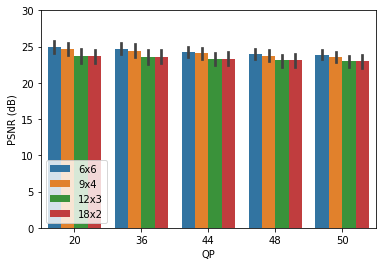

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


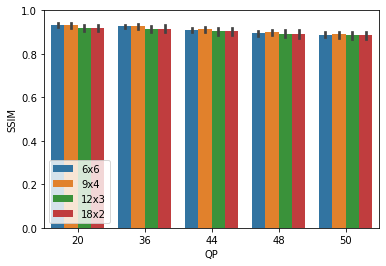

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


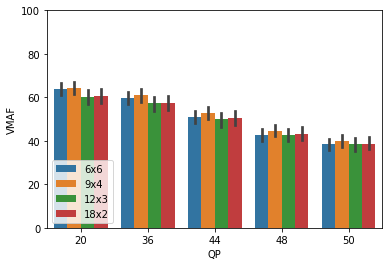

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


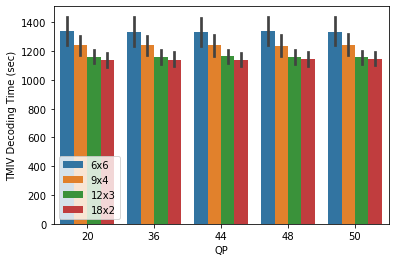

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


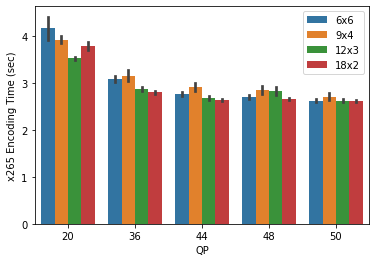

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


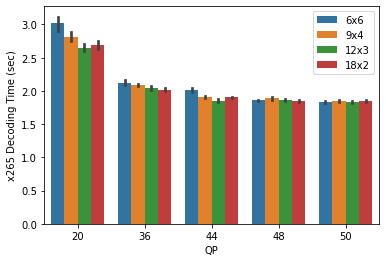

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


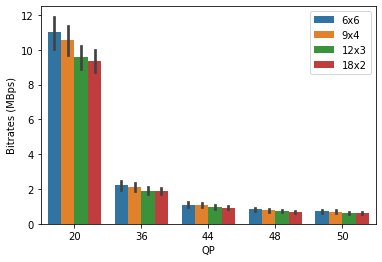

In [115]:
if __name__ == '__main__':
    main()